# Bank Churn Prediction

### Objective:

Given a Bank customer, build a neural network based classifier that can determine whether they will leave
or not in the next 6 months.

### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers
leaving and joining another service provider. It is important to understand which aspects of the service
influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities.

### Data Description:
The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore,
Geography, Gender, Age, Tenure, Balance etc.

### Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

In [1]:
import pandas as pd
import warnings
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs

## 1. Read the dataset

In [2]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bank_df.shape

(10000, 14)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2. Drop the columns which are unique for all users like IDs (5 points)

In [5]:
for column in bank_df.columns:
    print(f"{bank_df[column].nunique()} unique values in the {column} column")

10000 unique values in the RowNumber column
10000 unique values in the CustomerId column
2932 unique values in the Surname column
460 unique values in the CreditScore column
3 unique values in the Geography column
2 unique values in the Gender column
70 unique values in the Age column
11 unique values in the Tenure column
6382 unique values in the Balance column
4 unique values in the NumOfProducts column
2 unique values in the HasCrCard column
2 unique values in the IsActiveMember column
9999 unique values in the EstimatedSalary column
2 unique values in the Exited column


`RowNumber` and `CustomerId` are unique fields and would be dropped as they won't help our models. Also dropping surname because I don't feel a user's name affects their churn rate.

In [6]:
bank_df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Distinguish the features and target variable (5 points)

- **CreditScore:** A credit score is a number lenders use to help them decide how likely it is that they will be repaid on time if they give a person a loan or a credit card.
- **Geography:** Where the customer stays
- **Gender:** Customer's gender male or female
- **Age:** How old the user is
- **Tenure:** Tenure is the period or duration for which the loan amount is sanctioned
- **Balance:** Customer's account balance
- **NumOfProducts**
- **HasCrCard:** Does the customer have a credit card?
- **IsActiveMember:** Is the customer an active member?
- **EstimatedSalary:** Estimated salary the customer earns
- **Exited:** Did the customer churn?

Since the objective is to track predict churn so the `Exited` 

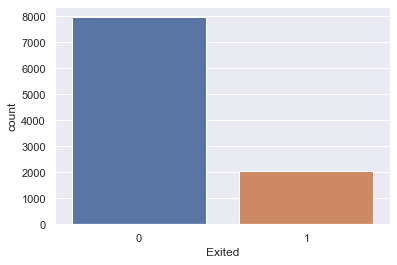

In [7]:
sns.countplot(bank_df['Exited'])

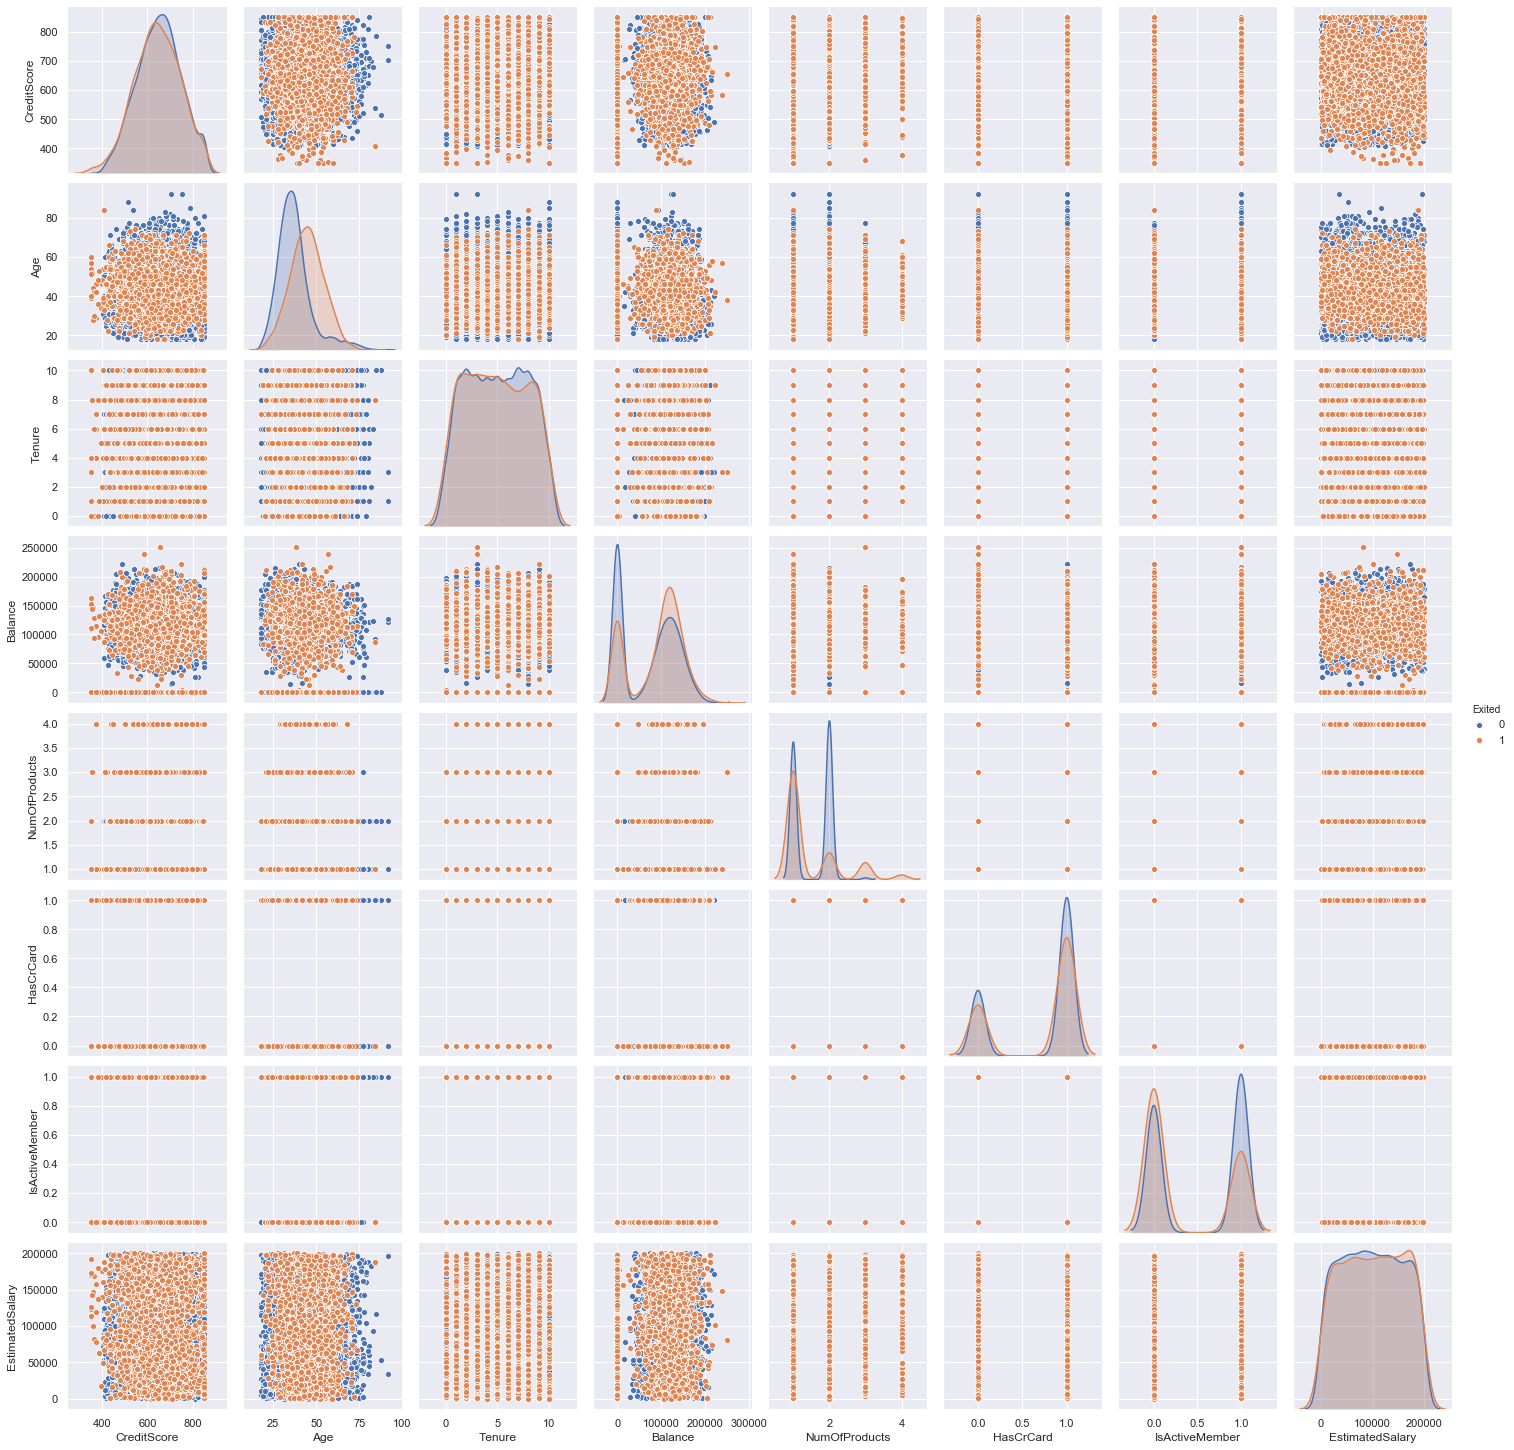

In [8]:
sns.pairplot(bank_df,  hue='Exited');

### One hot encode categorical columns

In [9]:
categorical_columns = ['Gender', 'Geography']
bank_df = pd.get_dummies(bank_df, columns=categorical_columns)
bank_df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1,1,0,0


## 4. Divide the data set into training and test sets (5points)

In [10]:
from sklearn.model_selection import train_test_split

y = bank_df["Exited"]
x = bank_df.drop(['Exited'], axis=1)

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True, stratify=bank_df['Exited'])

## 5. Normalize the train and test data (10points)

In [11]:
from sklearn import preprocessing

x_train = preprocessing.normalize(x_train[:])
x_test = preprocessing.normalize(x_test[:])


In [12]:
x_train.shape

(7000, 13)

### Model 1

In [13]:
#!pip install tensorflow==2.0.0
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

n_cols = x_train.shape[1]
model = Sequential()

model.add(Dense(13, input_shape = (13,), activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
optimizer = optimizers.Adam(lr = 0.001)

model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train.values, batch_size = 700, epochs = 10, verbose = 0)

In [16]:
results = model.evaluate(x_test, y_test.values, verbose = 0)

In [17]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.5190765146414439, 0.7963333]


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


y_pred_cls = model.predict_classes(np.array(x_test), batch_size=200, verbose=0)

print('Accuracy Model1 (Dropout): '+ str(results[1]))
print('Recall_score: ' + str(recall_score(y_test.values,y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,y_pred_cls)))
confusion_matrix(y_test.values, y_pred_cls)

Accuracy Model1 (Dropout): 0.7963333
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[2389,    0],
       [ 611,    0]])

### Model 2

In [54]:
model = Sequential()

model.add(Dense(32, input_shape = (13,), activation = 'tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(
    x_train, 
    y_train.values,
    validation_split = 0.2, 
    batch_size = 100, 
    epochs = 35, 
    verbose = 0
)

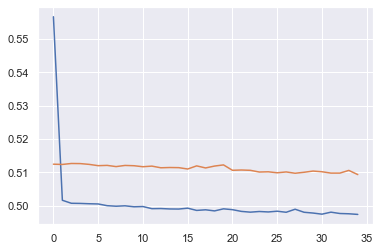

In [55]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])

### Differences between model 1 and model 2

Model 1 uses only 1 hidden layer for input and has an output layer. To improve it, Model 2 addes two extra hidden layers as an attempt to improve the result and uses more neurons in the second hidden layer to attempt to improve the results. The number of epochs was also increased to give room for more loss reduction

## Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold

In [42]:
results = model.evaluate(x_test, y_test.values, verbose=0)
y_pred_prob = model.predict(x_test, batch_size=200, verbose=0)
threshold = 0.5
y_pred = [1 if x >= threshold else 0 for x in y_pred_prob]

## Print the Accuracy score and confusion matrix

Accuracy Model2 (Dropout): 0.7963333
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


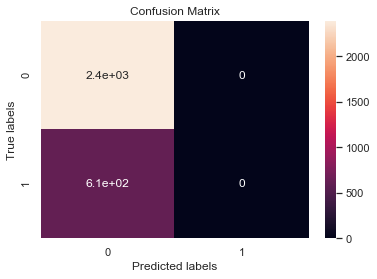

In [43]:
print('Accuracy Model2 (Dropout): '+ str(results[1]))
print('Recall_score: ' + str(recall_score(y_test.values,y_pred)))
print('Precision_score: ' + str(precision_score(y_test.values, y_pred)))
print('F-score: ' + str(f1_score(y_test.values,y_pred)))

cm = confusion_matrix(y_test.values, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

It looks like the second model isn't performing better than the first even with more hidden layers